In [ ]:
### TASK-1 ###
### SHIPMENTS OF HOUSEHOLD APPLIANCES: LINE GRAPHS ###
#The dataset, appliance shipments, contains a series of quarterly shipments (in millions of dollars) of US household appliances between 1985 and 1989

In [ ]:
#Create a well formatted time plot of the data#

import os
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
#import required datasets
shipments_df = pd.read_csv('../../.venv/lib/Datasets/ApplianceShipments.csv', index_col=False, usecols=[0,1]) #only use first and second columns

#Begin to explore columns for names
shipments_df.head()

#Split Quarter from year
print(shipments_df.dtypes)
shipments_df[['Quarter', 'Year']] = shipments_df['Quarter'].str.split('-', expand=True)
shipments_df.head()
#Time Plot
shipments_df.plot(x='Year', y='Shipments', legend=False)
plt.xlabel('Year')
plt.ylabel('Shipments')
plt.show

In [ ]:
#Does there appear to be a quarterly pattern? For a closer view of the patterns, zoom in to the range of 3500-5000 on the y-axis
#Time Plot using quarter on x-axis and focusing on 3500-5000 on x-axis
shipments_df.plot(x='Quarter', y='Shipments', ylim=[3500,5000], legend=False)
plt.xlabel('Quarter')
plt.ylabel('Shipments')
plt.show

In [ ]:
#Create one chart with four seperate lines that represent the quarters and zoom in on the range, 3500-5000
#Time Plot

#pivot data so each quarter as a seperate column of shipments
df_pivot = shipments_df.pivot(index='Year', columns='Quarter', values='Shipments')
df_pivot.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Shipments')
plt.show

In [ ]:
#Create a line graph of the series at a yearly aggregated level (total shipments per year)

#change Year column to datetime index
byYear = shipments_df['Shipments'].groupby(shipments_df['Year']).sum()
ax = byYear.plot(legend=False)
ax.set_xlabel('Year'); ax.set_ylabel('Total Shipments per Year')
plt.tight_layout(); plt.show()

In [ ]:
### TASK-2 ###
### SALES OF RIDING MOWERS: SCATTER PLOTS ###
#Riding mower manufacturer wants to identify best sales prospects. Classify households as prospective owners or nonowners on the basis of income (in 000s) and lot size (in 1000 ft^2). Looking at a sample of 24 households.


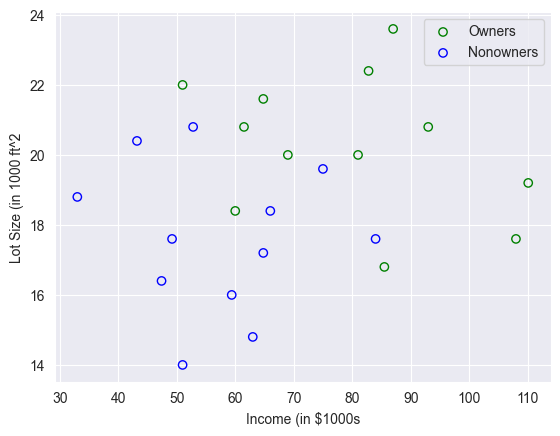

In [14]:
#Create a scatter plot of Lot size vs. income, color coded by the outcome variable (owner/non-owner). Create legible labels and legend, etc.

#Load dataset
mowers_df = pd.read_csv('../../.venv/lib/Datasets/RidingMowers.csv', index_col=False)

#Create scatterplot
_, ax = plt.subplots()
for ownershipValue, color in ('Owner', 'green'), ('Nonowner', 'blue'):
    subset_df = mowers_df[mowers_df.Ownership == ownershipValue]
    ax.scatter(subset_df.Income, subset_df.Lot_Size, color='none', edgecolor=color)
ax.set_xlabel('Income (in $1000s'); ax.set_ylabel('Lot Size (in 1000 ft^2')
ax.legend(["Owners", "Nonowners"])
plt.show()

In [ ]:
### Task-3 ###